In [2]:
import importlib
import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Made_to_R32_or_Higher
Did Not Make it to Round of 32      3173
Made it to Round of 32 or Higher     350
Name: count, dtype: int64


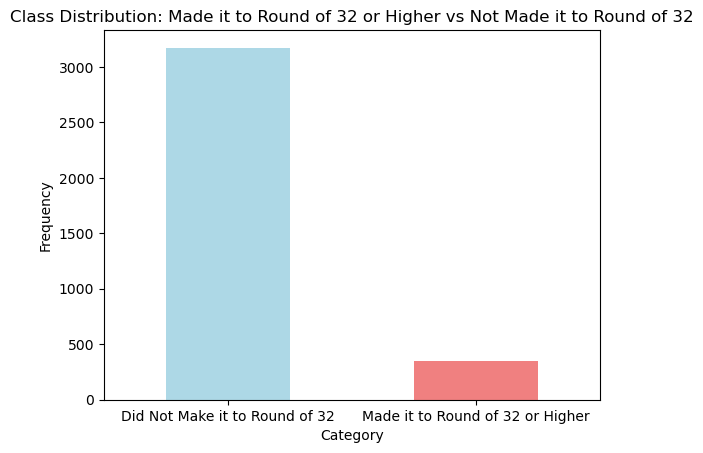

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/cbb.csv")

df['Made_to_R32_or_Higher'] = df['POSTSEASON'].apply(
    lambda x: 'Made it to Round of 32 or Higher' if x in ['R32', 'S16', 'E8', 'R68', 'F4', 'Champions'] 
    else 'Did Not Make it to Round of 32'
)

# Get the class distribution (counts of each category)
class_distribution = df['Made_to_R32_or_Higher'].value_counts()

# Print the class distribution
print(class_distribution)

# Plot the class distribution as a bar chart
class_distribution.plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Class Distribution: Made it to Round of 32 or Higher vs Not Made it to Round of 32')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Made_to_Tournament
Did not make it to tournament    2843
Made it to Tournament             680
Name: count, dtype: int64


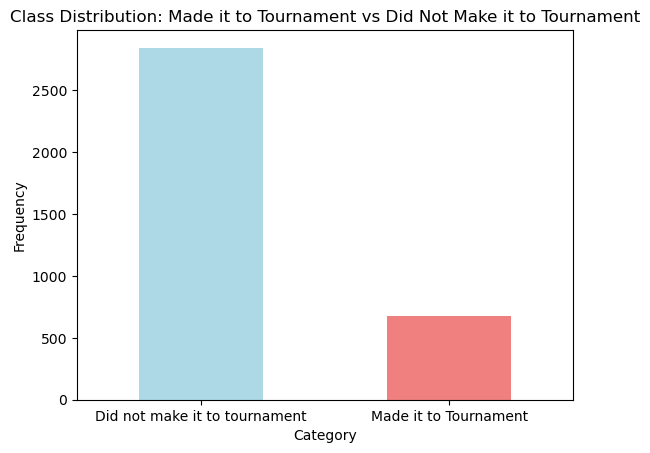

In [4]:
df['Made_to_Tournament'] = df['POSTSEASON'].apply(
    lambda x: 'Made it to Tournament' if pd.notna(x)
    else 'Did not make it to tournament'
)

class_distribution = df['Made_to_Tournament'].value_counts()

print(class_distribution)

class_distribution.plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Class Distribution: Made it to Tournament vs Did Not Make it to Tournament')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

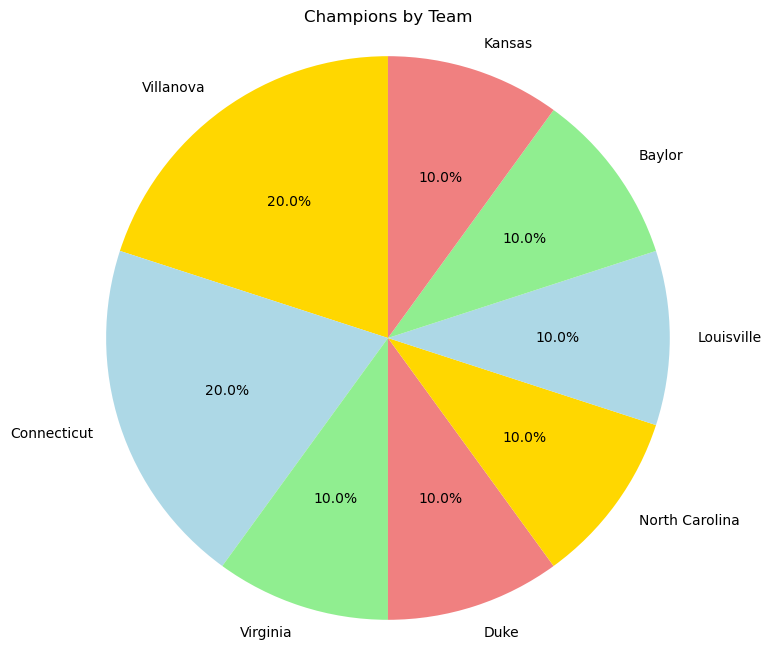

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("data/cbb.csv")

# Filter the data to get rows where POSTSEASON is 'Champions'
champions = df[df['POSTSEASON'] == 'Champions']['TEAM']

# Count the occurrences of each champion team
champion_counts = champions.value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(champion_counts, labels=champion_counts.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'lightblue', 'lightgreen', 'lightcoral'])
plt.title('Champions by Team')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


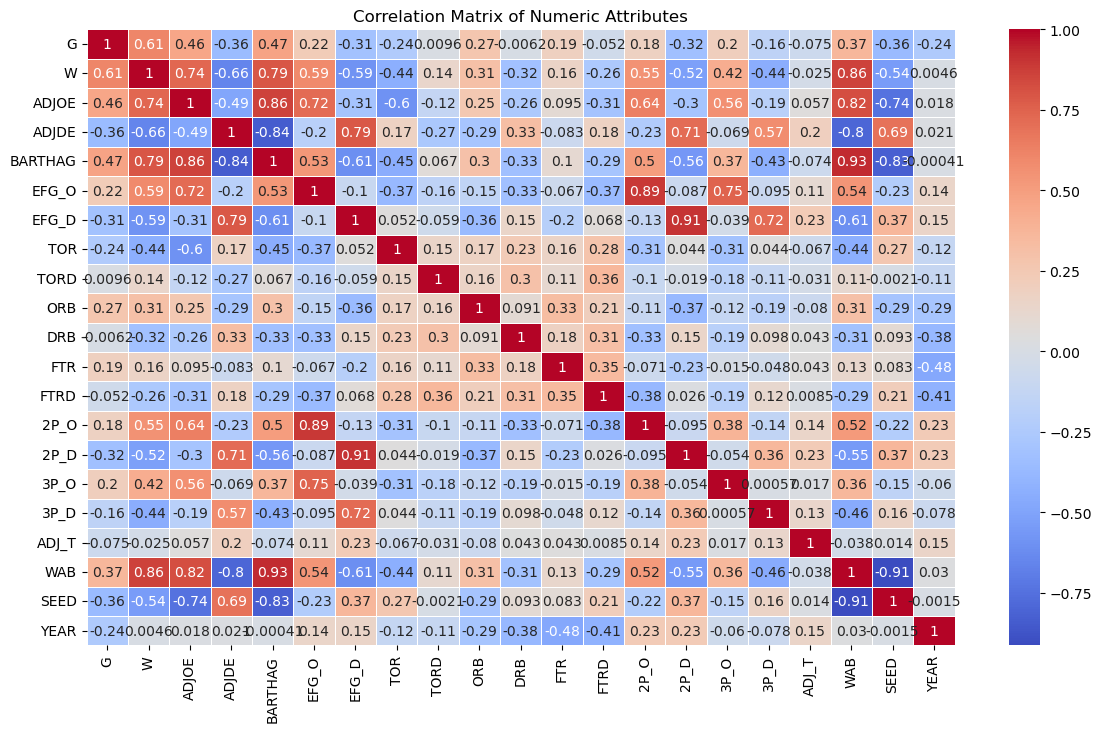

In [6]:
# Select only numeric columns from the dataset for correlation
numeric_data = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(14, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Attributes')
plt.show()

In [7]:
import pandas as pd
from mysklearn.myclassifiers import MyNaiveBayesClassifier
from mysklearn.myevaluation import train_test_split, confusion_matrix, accuracy_score, binary_precision_score,  binary_recall_score, binary_f1_score

# Load the dataset
df = pd.read_csv("data/cbb.csv")

# Feature selection
X = df[['W', 'ADJOE', 'ADJDE']].values.tolist()

# 1 for made tournament, 0 for did not make tournament
y = df['POSTSEASON'].apply(lambda x: 0 if pd.isna(x) else 1).tolist()


# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Initialize the classifier
nb_classifier = MyNaiveBayesClassifier()

# Train the classifier
nb_classifier.fit(X_train, y_train)
# Predict on test data
y_pred = nb_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("binary_precision_score:", binary_precision_score(y_test, y_pred, labels=[0, 1], pos_label=1))
print("binary_recall_score:", binary_recall_score(y_test, y_pred, labels=[0, 1], pos_label=1))
print("binary_f1_score:", binary_f1_score(y_test, y_pred, labels=[0, 1], pos_label=1))

labels = [0, 1]
cm = confusion_matrix(y_test, y_pred, labels)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.9016532428995337
binary_precision_score: 0.7438524590163934
binary_recall_score: 0.7723404255319148
binary_f1_score: 0.7578288100208769
Confusion Matrix:
[[1764, 125], [107, 363]]
